# Clearly Define Factor Universe

## 5 factor fama french from wrds

Size factor: smb

Value: hml (Book-to-market)

Profitability and Investment Factors: rmw (Robust minus weak profitability). cma (Conservative minus aggressive investment)

Momentum Factor: umd (Momentum)

Market Factor: mktrf (Market excess returns)

## from ken.french

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html 

Value/Growth Factors: E/P (Earnings/price), CF/P (Cashflow/Price), D/P (Dividend Yield), Net Share Issues
Quality: Operating Profitability, Investment, Accruals
Risk: Market Beta， Daily Variance, and Daily Residual Variance
reversal: short-term reversal, long-term reversal

# Gather and Prepare Factor Data

Obtain monthly returns for all factors from WRDS.

Ensure each factor series is clean and correctly aligned with dates.

Standardize factors if needed (e.g., mean-zero, unit-variance for statistical stability).

In [1]:
import pandas as pd

PATH = '../_data/'

In [2]:
# from ken-fama
LT_Reversal = pd.read_csv(PATH + 'F-F_LT_Reversal_Factor.csv').set_index('date')
ST_Reversal = pd.read_csv(PATH + 'F-F_ST_Reversal_Factor.csv').set_index('date')
AC = pd.read_csv(PATH + 'Portfolios_Formed_on_AC.csv').set_index('date')
BETA = pd.read_csv(PATH + 'Portfolios_Formed_on_BETA.csv').set_index('date')
CFP = pd.read_csv(PATH  + 'Portfolios_Formed_on_CF-P_Wout_Div.csv').set_index('date')
DP = pd.read_csv(PATH  + 'Portfolios_Formed_on_D-P_Wout_Div.csv').set_index('date')
EP = pd.read_csv(PATH  + 'Portfolios_Formed_on_E-P_Wout_Div.csv').set_index('date')
NI = pd.read_csv(PATH  + 'Portfolios_Formed_on_NI.csv').set_index('date')
RESVAR = pd.read_csv(PATH + 'Portfolios_Formed_on_RESVAR.csv').set_index('date')
VAR = pd.read_csv(PATH  + 'Portfolios_Formed_on_VAR.csv').set_index('date')

In [3]:
# from wrds 5 fct + mom
df_5fct = pd.read_csv(PATH + 'famafrench_5fct_momentum_monthly.csv').set_index('date')
df_5fct.tail()

,mktrf,smb,hml,rmw,cma,umd,rf
date,,,,,,,
2024-12-01,-0.0315,-0.0384,-0.0300,0.0191,-0.0121,-0.0030,0.0037
2025-01-01,0.0280,-0.0122,0.0162,-0.0233,-0.0324,0.0095,0.0037
2025-02-01,-0.0243,-0.0493,0.0491,0.0109,0.0306,-0.0082,0.0033
2025-03-01,-0.0639,-0.0149,0.0290,0.0211,-0.0047,-0.0282,0.0034
2025-04-01,-0.0085,-0.0185,-0.0341,-0.0284,-0.0267,0.0494,0.0035


In [4]:
dict_ = {'AC': AC, 'BETA': BETA, 'CFP':CFP, 'DP': DP, 'EP': EP, 'NI': NI, 'RESVAR': RESVAR, 'VAR':VAR}

df_10 = pd.DataFrame()
df_20 = pd.DataFrame()

for fct in dict_.keys():
    df = dict_[fct]
    s_20 = df['Hi 20'] - df['Lo 20']
    s_10 = df['Hi 10'] - df['Lo 10']
    s_20.name = fct
    s_10.name = fct
    
    df_20 = pd.concat([df_20, s_20], axis = 1)
    df_10 = pd.concat([df_10, s_10], axis = 1)
    
df_10 = pd.concat([df_10, LT_Reversal, ST_Reversal, df_5fct], axis = 1)
df_20 = pd.concat([df_20, LT_Reversal, ST_Reversal, df_5fct], axis = 1)

In [5]:
# df_10 (deciles) hi10 - lo10
df_10.tail()

,AC,BETA,CFP,DP,EP,NI,RESVAR,VAR,LT_Rev,ST_Rev,mktrf,smb,hml,rmw,cma,umd,rf
2024-12-01,0.0161,0.1215,-0.0510,-0.0689,-0.0400,-0.0279,0.0806,0.0708,-0.0164,0.0037,-0.0315,-0.0384,-0.0300,0.0191,-0.0121,-0.0030,0.0037
2025-01-01,-0.0170,-0.0228,0.0541,0.0178,0.0499,-0.0062,-0.0032,-0.0038,0.0128,0.0281,0.0280,-0.0122,0.0162,-0.0233,-0.0324,0.0095,0.0037
2025-02-01,0.0065,-0.2399,0.0247,0.0486,-0.0488,-0.1043,-0.1243,-0.2004,0.0248,0.0327,-0.0243,-0.0493,0.0491,0.0109,0.0306,-0.0082,0.0033
2025-03-01,-0.0025,-0.1033,0.0676,0.0972,0.0322,-0.0245,-0.0906,-0.1213,0.0179,-0.0361,-0.0639,-0.0149,0.0290,0.0211,-0.0047,-0.0282,0.0034
2025-04-01,0.0049,0.0698,-0.1088,-0.0449,-0.0770,0.0101,0.1093,0.0710,-0.0127,0.0228,-0.0085,-0.0185,-0.0341,-0.0284,-0.0267,0.0494,0.0035


In [6]:
# df_20 (quintiles) hi20 - lo20
df_20.tail()

,AC,BETA,CFP,DP,EP,NI,RESVAR,VAR,LT_Rev,ST_Rev,mktrf,smb,hml,rmw,cma,umd,rf
2024-12-01,-0.0059,0.0631,-0.0819,-0.0672,-0.0700,0.0010,0.0245,0.0337,-0.0164,0.0037,-0.0315,-0.0384,-0.0300,0.0191,-0.0121,-0.0030,0.0037
2025-01-01,-0.0138,0.0026,0.0278,0.0192,0.0486,0.0105,0.0050,0.0136,0.0128,0.0281,0.0280,-0.0122,0.0162,-0.0233,-0.0324,0.0095,0.0037
2025-02-01,0.0006,-0.1708,0.0642,0.0637,0.0514,-0.0754,-0.1588,-0.1012,0.0248,0.0327,-0.0243,-0.0493,0.0491,0.0109,0.0306,-0.0082,0.0033
2025-03-01,0.0021,-0.0961,0.0893,0.0712,0.0499,-0.0279,-0.0703,-0.1067,0.0179,-0.0361,-0.0639,-0.0149,0.0290,0.0211,-0.0047,-0.0282,0.0034
2025-04-01,-0.0028,0.0787,-0.0719,-0.0429,-0.0564,0.0816,0.0764,0.0704,-0.0127,0.0228,-0.0085,-0.0185,-0.0341,-0.0284,-0.0267,0.0494,0.0035


# Initial Factor Diagnostics and Stationarity Checks

Conduct ADF (Augmented Dickey-Fuller) and KPSS tests to verify time stationarity.

Drop or adjust factors with serious non-stationary issues.

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
def adf_test_factors_df(factors_df, alpha=0.05):
    cols = ['ADF', 'pvalue', 'usedlag', 'nobs', 'critical_values', 'icbest', 'null']
    adf_results_df = pd.DataFrame(columns=cols)

    for factor in factors_df.columns:
        series = factors_df[factor].dropna()

        try:
            adf_result = adfuller(series, autolag='AIC', regression='c')
            adf, pval, usedlag, nobs, critical_values, icbest = adf_result
            critical_value_5 = critical_values['5%']

            # null = False --> reject H0 --> no unitroot --> time stationary
            null_hypothesis = pval >= alpha

            adf_results_df.loc[factor] = [
                round(adf, 4),
                round(pval, 4),
                usedlag,
                nobs,
                round(critical_value_5, 4),
                icbest,
                null_hypothesis
            ]
        except Exception as e:
            adf_results_df.loc[factor] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, f'Error: {e}']

    adf_results_df.index.name = 'Factor'

    return adf_results_df

In [9]:
adf_test_factors_df(df_10, alpha=0.05)

,ADF,pvalue,usedlag,nobs,critical_values,icbest,null
Factor,,,,,,,
AC,-6.1027,0.0000,3,180,-2.8777,-722.690063,False
BETA,-9.5780,0.0000,2,181,-2.8776,-353.139226,False
CFP,-11.8327,0.0000,0,183,-2.8775,-411.886381,False
DP,-6.2102,0.0000,5,178,-2.8779,-520.361991,False
EP,-7.1210,0.0000,2,181,-2.8776,-452.924027,False
NI,-12.1490,0.0000,0,183,-2.8775,-551.572088,False
RESVAR,-5.1312,0.0000,4,179,-2.8778,-403.633480,False
VAR,-9.2095,0.0000,2,181,-2.8776,-359.990916,False
LT_Rev,-8.1095,0.0000,1,182,-2.8776,-710.891539,False


In [10]:
adf_test_factors_df(df_20, alpha=0.05)

,ADF,pvalue,usedlag,nobs,critical_values,icbest,null
Factor,,,,,,,
AC,-6.1197,0.0000,3,180,-2.8777,-824.334579,False
BETA,-4.4792,0.0002,5,178,-2.8779,-442.600292,False
CFP,-10.2862,0.0000,1,182,-2.8776,-497.088500,False
DP,-6.8384,0.0000,2,181,-2.8776,-590.938775,False
EP,-6.9933,0.0000,2,181,-2.8776,-506.533577,False
NI,-8.8596,0.0000,2,181,-2.8776,-588.762876,False
RESVAR,-9.6783,0.0000,2,181,-2.8776,-466.120614,False
VAR,-13.2484,0.0000,0,183,-2.8775,-426.016083,False
LT_Rev,-8.1095,0.0000,1,182,-2.8776,-710.891539,False


# Estimate Stock Factor Loadings (First Step of Fama-MacBeth)

Run time-series regressions for each stock in your ETF portfolio (e.g., VHT) separately

Get beta loadings (β) for each stock on each factor. Each stock has a vector of factor loadings.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
vht_rtn = pd.read_parquet(PATH + 'vht_mon_returns.parquet').pivot_table(index = 'mthcaldt', columns = 'ticker', values = 'mthret')

In [13]:
# adjust index to each trading calendar date (end of month)
fct_10 = df_10.copy().iloc[:-4]
fct_10.index = vht_rtn.index

fct_20 = df_20.copy().iloc[:-4]
fct_20.index = vht_rtn.index

In [14]:
fct_list = ['AC', 'BETA', 'CFP', 'DP', 'EP', 'NI', 'RESVAR', 'VAR', 'LT_Rev', 'ST_Rev', 'mktrf', 'smb', 'hml', 'rmw', 'cma', 'umd']

def get_beta(factors_df):
    betas = pd.DataFrame(index=vht_rtn.columns, columns=['Intercept']+fct_list)
    for stock in vht_rtn.columns:
        stock_rtn = vht_rtn[stock].dropna()
        if len(stock_rtn) < 12: # at least one-year data
            continue
        factors_df1 = factors_df.loc[stock_rtn.index,:]
        stock_excess_rtn = stock_rtn.values - factors_df1['rf']
        factors = factors_df1[fct_list]
        lr = LinearRegression()
        lr.fit(factors, stock_excess_rtn)

        betas.loc[stock] = [lr.intercept_] + lr.coef_.tolist()

    return betas

In [15]:
beta_10 = get_beta(fct_10)
beta_10.head()

,Intercept,AC,BETA,CFP,DP,EP,NI,RESVAR,VAR,LT_Rev,ST_Rev,mktrf,smb,hml,rmw,cma,umd
ticker,,,,,,,,,,,,,,,,,
A,-0.002325,0.10407,-0.048783,-0.148195,-0.174409,0.243909,-0.171173,0.222633,-0.219292,0.088491,0.134811,1.282098,0.14833,-0.075924,-0.441234,0.110202,0.09811
ABAX,-0.001901,-0.811355,0.265161,0.458437,-0.304175,-0.369473,-0.421917,0.065336,-0.12422,-0.185942,0.267834,0.840277,0.501606,-1.003414,-0.365756,0.669437,0.387431
ABBV,0.009922,-0.02497,-0.175931,0.086793,0.173597,0.054332,0.166284,0.206377,-0.103537,-0.409542,-0.362337,1.018763,-0.123678,0.051019,-0.17064,0.623851,-0.152838
ABEO,0.000675,-0.027901,-0.599004,0.619544,0.450998,-0.241228,0.324634,-0.229984,0.451029,3.025669,-0.594278,1.71052,-0.064206,-0.163315,-1.854149,-4.315001,0.094903
ABMD,0.006462,-0.169916,-0.093908,-0.064511,-0.450438,0.041506,-0.638974,0.406467,-0.60198,0.027378,0.382495,1.386172,2.139221,-0.949216,-0.001,0.112849,0.725399


In [16]:
beta_20 = get_beta(fct_20)
beta_20.tail()

,Intercept,AC,BETA,CFP,DP,EP,NI,RESVAR,VAR,LT_Rev,ST_Rev,mktrf,smb,hml,rmw,cma,umd
ticker,,,,,,,,,,,,,,,,,
ZIMV,0.00621,1.85214,-0.096816,2.820691,-4.249297,-3.277127,4.186597,-0.778444,-0.036147,-3.665871,-0.338266,-0.613891,3.466226,4.945597,1.802949,4.457454,-1.450997
ZNTL,-0.035333,2.475391,0.020076,2.357568,-0.601872,-1.485379,-1.083289,1.485716,-2.097208,-0.643134,-0.437633,2.043831,3.406236,-0.724148,0.271094,-3.478721,-0.312565
ZTS,0.00437,0.123261,-0.312908,0.018982,-0.144656,-0.104608,0.081317,-0.105509,0.119667,-0.648951,0.021153,0.916027,0.548581,-0.107498,0.209606,0.146682,-0.012629
ZYME,0.02574,0.461983,-0.954863,-0.386273,0.577387,0.076829,-0.014962,-0.290079,0.338068,-0.391661,0.148712,1.72044,0.078106,-0.25753,-2.458007,-1.757721,0.219319
ZYXI,0.021212,0.842224,-0.677355,0.962422,-0.017169,-0.434567,-0.46584,1.621446,-0.050773,-0.531579,1.21885,0.297114,0.166431,0.033144,0.809674,0.452918,0.939332


# Fama-MacBeth Cross-sectional Regressions (Second Step)

For each month t, run a cross-sectional regression across stocks, regressing returns on their betas estimated previously

Obtain monthly factor risk premia (γ_j,t)

Average monthly γ values to obtain mean factor premia (λ). Assess statistical significance of each factor

In [17]:
def get_fct_rtn(fct_df, beta_df):
    factor_returns = pd.DataFrame(index=vht_rtn.index, columns=['Intercept'] + fct_list)

    for month in vht_rtn.index:
        monthly_rtn = vht_rtn.loc[month].dropna()
        monthly_rf = fct_df.loc[month, 'rf']
        monthly_excess_rtn = monthly_rtn - monthly_rf
        monthly_beta = beta_df.loc[monthly_rtn.index].dropna()
        
        if monthly_beta.empty or len(monthly_beta) <= len(fct_list):
            continue

        lr = LinearRegression(fit_intercept=False)
        lr.fit(monthly_beta, monthly_excess_rtn.loc[monthly_beta.index])

        factor_returns.loc[month] = lr.coef_

    factor_returns = factor_returns.dropna()
    factor_returns.index.name = 'Date'
    return factor_returns

In [18]:
fct_rtn_10 = get_fct_rtn(fct_10, beta_10)
fct_rtn_10.tail()

,Intercept,AC,BETA,CFP,DP,EP,NI,RESVAR,VAR,LT_Rev,ST_Rev,mktrf,smb,hml,rmw,cma,umd
Date,,,,,,,,,,,,,,,,,
2024-08-30,1.102827,-0.009703,-0.100011,-0.068641,-0.001719,-0.072935,-0.033857,-0.068891,-0.103949,0.008874,0.00022,0.003606,-0.03663,-0.010245,0.00622,0.006689,0.046515
2024-09-30,0.695821,-0.03325,0.037717,-0.023789,-0.003702,-0.02404,0.005247,-0.005871,-0.001037,0.000352,-0.005943,-0.014165,-0.00918,-0.023886,-0.000968,0.00332,0.010272
2024-10-31,1.884469,-0.038433,0.009523,0.013745,-0.027175,0.004187,0.029923,0.056594,0.10438,0.015956,-0.031507,-0.014918,-0.018994,0.007518,-0.010238,-0.000246,0.025748
2024-11-29,1.522951,-0.04863,0.320062,-0.034186,-0.041279,0.003925,0.031792,0.202313,0.261745,-0.014132,-0.069851,0.097072,0.020603,-0.001333,-0.007634,-0.03111,-0.002858
2024-12-31,1.105603,0.004053,0.13256,-0.074635,-0.033269,-0.064576,-0.030453,0.072634,0.053275,-0.015069,-0.022597,-0.023818,-0.017372,-0.005855,0.013647,-0.000118,-0.012083


In [19]:
fct_rtn_20 = get_fct_rtn(fct_20, beta_20)
fct_rtn_20.tail()

,Intercept,AC,BETA,CFP,DP,EP,NI,RESVAR,VAR,LT_Rev,ST_Rev,mktrf,smb,hml,rmw,cma,umd
Date,,,,,,,,,,,,,,,,,
2024-08-30,1.464584,-0.011165,-0.037204,-0.04081,-0.026633,-0.034821,-0.022706,-0.038146,-0.03173,-0.005883,0.00521,0.019935,-0.041256,-0.020936,0.013991,-0.006258,0.040133
2024-09-30,0.613118,-0.007963,0.01043,-0.01931,-0.00178,-0.029005,-0.001168,0.02511,0.007451,-0.002638,-0.002434,-0.019016,-0.007826,-0.027946,-0.003026,0.001085,0.012305
2024-10-31,1.318658,-0.022852,0.013403,0.011379,0.008548,0.026368,0.056129,0.012988,0.033785,0.016533,-0.033616,-0.031228,-0.011894,0.002076,-0.021525,0.006892,0.040402
2024-11-29,1.526447,-0.040042,0.263629,-0.002513,0.000052,0.018471,0.116374,0.179068,0.055183,-0.007871,-0.05747,0.071815,0.040756,-0.005277,-0.014963,-0.027084,0.001633
2024-12-31,1.160685,-0.018733,0.081073,-0.075986,-0.053528,-0.053889,0.021671,0.03186,0.049271,-0.020009,-0.015514,-0.028284,-0.022772,-0.016183,0.011471,-0.008607,-0.008581


# Final Factor Set Validation

Verify economic rationale: selected factors should align logically with financial theory.

Run robustness checks (subsamples, different time periods).

# Construct Tradable Benchmark Portfolio

Form a tradable portfolio that replicates factor exposure: Long-short portfolios: typically long high-exposure stocks, short low-exposure stocks. Equally or value-weighted factor construction (typically value-weighted).

In [20]:
# cal the fct weight
def fct_weight(beta_df):
    factor_weights = pd.DataFrame(index=vht_rtn.index, columns=beta_df.columns[1:])

    for month in vht_rtn.index:
        monthly_rtn = vht_rtn.loc[month].dropna()
        monthly_beta = beta_df.loc[monthly_rtn.index].dropna()
        factor_weights.loc[month] = monthly_beta.iloc[:,1:].mean() # weight =  mean of betas of component stk(each month etf position)

    factor_weights = factor_weights.astype(float)
    
    return factor_weights

In [21]:
w_10 = fct_weight(beta_10)
w_10.head()

,AC,BETA,CFP,DP,EP,NI,RESVAR,VAR,LT_Rev,ST_Rev,mktrf,smb,hml,rmw,cma,umd
mthcaldt,,,,,,,,,,,,,,,,
2010-01-29,0.032320,-0.204227,-0.013719,-0.026817,0.032807,-0.096505,0.120763,-0.031358,0.040820,0.010667,1.036193,0.881049,-0.392234,-0.608604,-0.040947,-0.018210
2010-02-26,0.032764,-0.205149,-0.013305,-0.027989,0.031632,-0.095572,0.117918,-0.030457,0.043899,0.010109,1.035263,0.884907,-0.394095,-0.608988,-0.040207,-0.020879
2010-03-31,0.016469,-0.199407,-0.012169,-0.021883,0.034763,-0.089086,0.120691,-0.038205,0.035401,0.002949,1.029969,0.886469,-0.399663,-0.608717,-0.027366,-0.025856
2010-04-30,0.020782,-0.201268,-0.015928,-0.017114,0.034941,-0.065783,0.093125,-0.000715,0.008107,-0.015022,1.030925,0.867220,-0.393488,-0.609154,-0.024273,-0.039550
2010-05-28,0.020782,-0.201268,-0.015928,-0.017114,0.034941,-0.065783,0.093125,-0.000715,0.008107,-0.015022,1.030925,0.867220,-0.393488,-0.609154,-0.024273,-0.039550


In [22]:
w_20 = fct_weight(beta_20)
w_20.tail()

,AC,BETA,CFP,DP,EP,NI,RESVAR,VAR,LT_Rev,ST_Rev,mktrf,smb,hml,rmw,cma,umd
mthcaldt,,,,,,,,,,,,,,,,
2024-08-30,0.457687,-0.408377,0.181476,-0.516270,0.072038,0.041043,0.043627,-0.018323,0.094322,0.198920,1.068033,1.255220,-0.228891,-1.197778,-0.405829,-0.029917
2024-09-30,0.459585,-0.407503,0.182650,-0.514374,0.073048,0.044436,0.046868,-0.018898,0.095497,0.199234,1.066608,1.247888,-0.230653,-1.195466,-0.404305,-0.028460
2024-10-31,0.455360,-0.403737,0.182546,-0.519336,0.074904,0.043546,0.048430,-0.019417,0.096797,0.198004,1.062013,1.243625,-0.223467,-1.188513,-0.398305,-0.028251
2024-11-29,0.461928,-0.402876,0.195141,-0.515178,0.066155,0.043713,0.052366,-0.017924,0.083181,0.195038,1.062845,1.244264,-0.220750,-1.186529,-0.398163,-0.020656
2024-12-31,0.461624,-0.407427,0.205367,-0.511137,0.055257,0.036060,0.063621,-0.018960,0.078911,0.192408,1.068078,1.254867,-0.215765,-1.179437,-0.416252,-0.016991


In [23]:
def add_iniial_date(series):
    first_date = series.index[0]
    initial_date = first_date - pd.DateOffset(months=1)
    inital_row = pd.Series(0, index = [initial_date])
    series_adj = pd.concat([inital_row, series])
    return series_adj

def bmk_rtn(factor_weights, factor_returns):
    bmk_rtn = (factor_weights * factor_returns.drop(columns='Intercept')).sum(axis=1)
    bmk_rtn.name = 'Benchmark_Return'
    bmk_rtn_adj = add_iniial_date(bmk_rtn)
    return bmk_rtn_adj

In [24]:
bmk_rtn10 = bmk_rtn(w_10, fct_rtn_10)
bmk_rtn10.name = 'bmk decile group'

bmk_rtn20 = bmk_rtn(w_20, fct_rtn_20)
bmk_rtn20.name = 'bmk quintile group'

etf_rtn = vht_rtn.mean(axis=1)
etf_rtn_1 = add_iniial_date(etf_rtn)
etf_rtn.name = 'VTH ETF equal-weighted rtn'

In [25]:
# plot cumulative rtn
bmk_rtn = (pd.concat([bmk_rtn10, bmk_rtn20, etf_rtn], axis = 1) + 1).cumprod() - 1

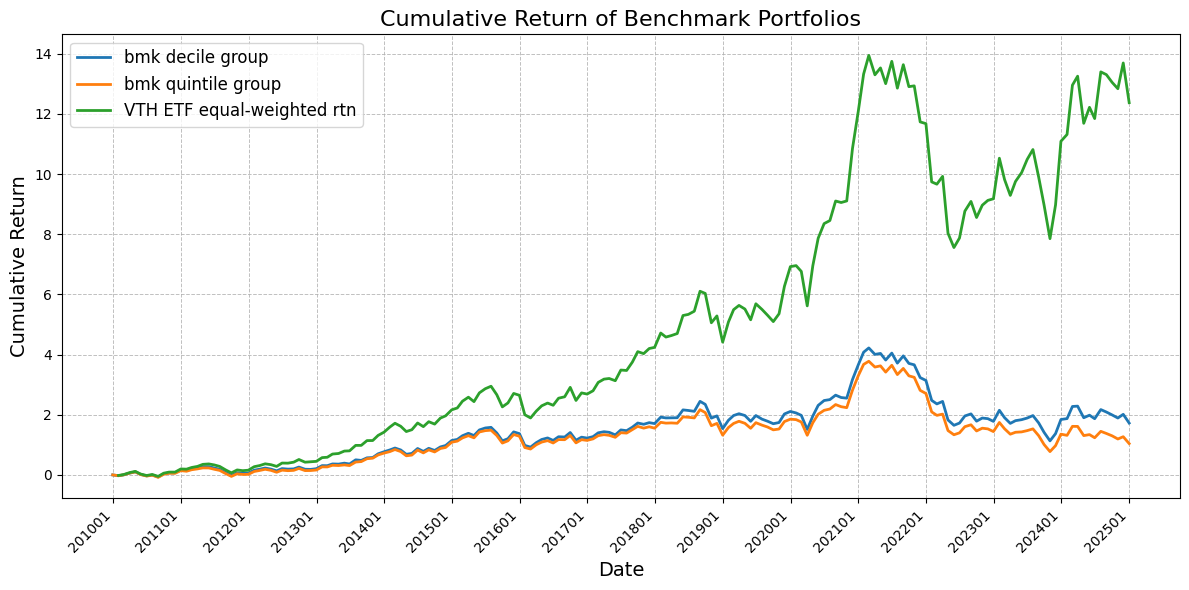

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


ax = bmk_rtn.plot(figsize=(12, 6), linewidth=2)


ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y%m'))
ax.xaxis.set_major_locator(mdates.YearLocator()) 
plt.xticks(rotation=45) 

plt.title('Cumulative Return of Benchmark Portfolios', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.8)

plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()

plt.show()

# Benchmark Performance Analysis

Compute cumulative returns, Sharpe ratios, Information ratios.

Compare your benchmark returns against traditional models (e.g., Fama-French 5-factor or market returns) to justify effectiveness.